In [1]:
import re
import pandas as pd

# Read the SQL file
with open('vuln_data.sql', 'r') as file:
    sql_content = file.read()

# Extract data using regular expressions
data_pattern = re.compile(r"COPY public\.vuln \(.*?\) FROM stdin;\n(.*?)\n\\\.", re.DOTALL)
data_match = data_pattern.search(sql_content)

if data_match:
    # Extract lines containing data
    data_lines = data_match.group(1).split('\n')
    
    # Convert lines into a list of values
    data = [line.split('\t') for line in data_lines]
    
    # Define column names
    columns = ['id', 'title', 'description', 'severity', 'cve', 'sensor', 'endpoint']
    
    # Create a DataFrame from the data
    df = pd.DataFrame(data, columns=columns)
    
    # Display the first few rows of the DataFrame
    print(df.head())
else:
    # Print a message if no data is found
    print("No data found in the SQL file.")


    id                                title  \
0  773     Information disclosure in config   
1  777          Session fixation in session   
2  782  CSRF vulnerability in cart checkout   
3  784       Weak encryption in api encrypt   
4  786          Session fixation discovered   

                                         description severity   cve sensor  \
0  Application config files are publicly accessib...      low  null  ToolA   
1  /session endpoint fails to renew session IDs. ...     high  null  ToolC   
2  Cart checkout page is susceptible to CSRF atta...   medium  null  ToolB   
3  Encryption mechanism in /api/encrypt is weak. ...   medium  null  ToolD   
4  Session fixation bug discovered in /session en...     high  null  ToolB   

       endpoint  
0       /config  
1      /session  
2         /cart  
3  /api/encrypt  
4      /session  


In [2]:
df

,id,title,description,severity,cve,sensor,endpoint
0,773,Information disclosure in config,Application config files are publicly accessib...,low,null,ToolA,/config
1,777,Session fixation in session,/session endpoint fails to renew session IDs. ...,high,null,ToolC,/session
2,782,CSRF vulnerability in cart checkout,Cart checkout page is susceptible to CSRF atta...,medium,null,ToolB,/cart
3,784,Weak encryption in api encrypt,Encryption mechanism in /api/encrypt is weak. ...,medium,null,ToolD,/api/encrypt
4,786,Session fixation discovered,Session fixation bug discovered in /session en...,high,null,ToolB,/session
5,789,Missing HSTS policy,Lack of HSTS policy in the /secure endpoint le...,low,null,ToolB,/secure
6,790,Reflected XSS on user profile,"Reflected XSS discovered in profile endpoint, ...",medium,null,ToolC,/profile
7,791,Comments injection flaw,The /comments section is vulnerable to injecti...,high,null,ToolC,/comments
8,792,SQL Injection vulnerability (login),SQL injection detected at the login endpoint. ...,medium,null,ToolB,/login
9,793,Remote code execution found at /profile,The /profile endpoint can be exploited to run ...,critical,null,ToolB,/profile


In [3]:
df['title'].value_counts()

title
Information disclosure in config                    1
Unauthenticated file upload vulnerability           1
Server-Side Template Injection in old Apache        1
Secret key exposure                                 1
Cache poisoning in /assets                          1
Subdomain takeover vulnerability                    1
Public config leads to info disclosure              1
Profile authorization bypass vulnerability          1
Misconfigured config endpoint                       1
Arbitrary file upload vulnerability                 1
Directory Traversal in files                        1
Session fixation in session                         1
Arbitrary code execution in /profile                1
Comment injection vulnerability                     1
Session fixation vulnerability                      1
Session fixation flaw                               1
Suspected SQL Injection in adminstrator login       1
RCE vulnerability in /config                        1
CRLF injection in /hea

In [4]:
df['severity'].value_counts()

severity
high        19
medium      14
critical     7
low          2
Name: count, dtype: int64

In [5]:
df['sensor'].value_counts()

sensor
ToolC    12
ToolA    11
ToolB    11
ToolD     8
Name: count, dtype: int64

In [6]:
df['endpoint'].value_counts()

endpoint
/profile        8
/config         6
/session        4
/login          4
/apache         4
/upload         4
/comments       3
/cart           2
/api/encrypt    1
/secure         1
/secret         1
/assets         1
/subdomain      1
/files          1
/headers        1
Name: count, dtype: int64

In [7]:
df.groupby(['endpoint', 'severity'], as_index = False)['id'].count()

,endpoint,severity,id
0,/apache,critical,1
1,/apache,high,2
2,/apache,medium,1
3,/api/encrypt,medium,1
4,/assets,high,1
5,/cart,medium,2
6,/comments,high,3
7,/config,critical,1
8,/config,high,3
9,/config,low,1


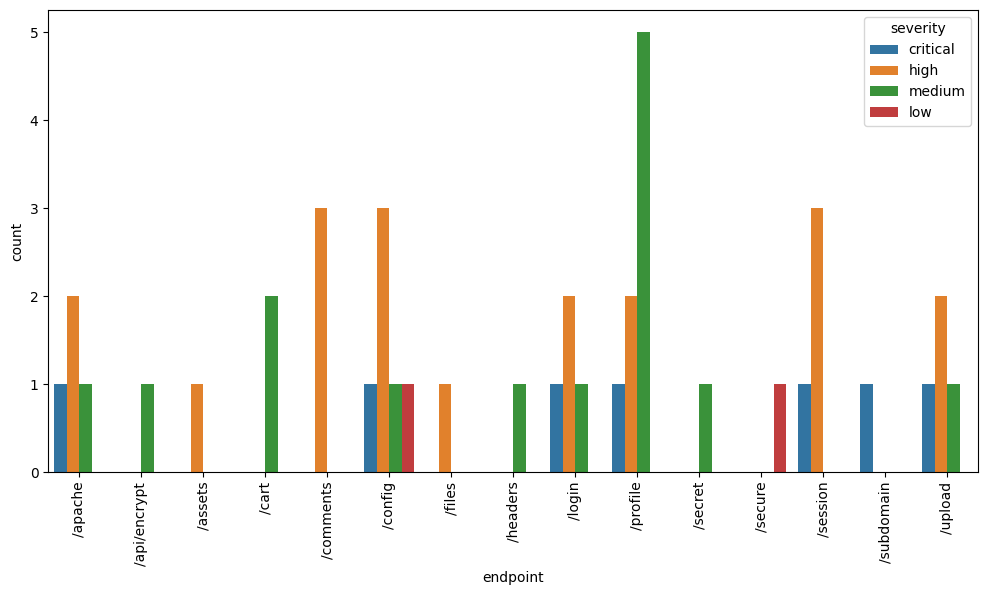

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df_group = df.groupby(['endpoint', 'severity'], as_index = False)['id'].count()

df_group = df_group.rename(columns={'id': 'count'})

plt.figure(figsize=(12,6))
sns.barplot(data = df_group, x = 'endpoint' , y ='count' , hue='severity' )
plt.xticks(rotation=90)

plt.show()

In [9]:
df['cve'].value_counts()

cve
null             23
CVE-2025-1234     2
CVE-2022-5555     2
CVE-2021-4444     2
CVE-2025-0004     2
CVE-2021-1111     1
CVE-2023-3333     1
CVE-2028-0001     1
CVE-2028-0002     1
CVE-2028-0003     1
CVE-2025-0003     1
CVE-2024-0001     1
CVE-2027-1001     1
CVE-2025-0002     1
CVE-2022-2222     1
CVE-2027-1002     1
Name: count, dtype: int64

In [10]:
df.columns

Index(['id', 'title', 'description', 'severity', 'cve', 'sensor', 'endpoint'], dtype='object')

In [11]:
# Group by 'endpoint' and assign tags
df['tag'] = df.groupby('endpoint',).ngroup().apply(lambda x: f"group_{x+1}")

In [12]:
df.columns

Index(['id', 'title', 'description', 'severity', 'cve', 'sensor', 'endpoint',
       'tag'],
      dtype='object')

In [13]:
df.sort_values(by='tag')

,id,title,description,severity,cve,sensor,endpoint,tag
21,765,Obsolete Apache vulnerable to template injection,Obsolete version 2.2.x can be exploited via SS...,high,CVE-2025-1234,ToolD,/apache,group_1
40,799,Apache 2.2.9 with SSTI flaw,Outdated Apache release allows server-side tem...,critical,null,ToolB,/apache,group_1
11,796,SSTI vulnerability in EOL Apache,An end-of-life Apache version is prone to serv...,medium,null,ToolC,/apache,group_1
23,768,Server-Side Template Injection in old Apache,Apache 2.2.x is vulnerable to server-side temp...,high,CVE-2025-1234,ToolA,/apache,group_1
22,767,Profile XSS vulnerability,The user profile section may allow XSS due to ...,medium,CVE-2023-3333,ToolD,/profile,group_10
28,778,Profile authorization bypass vulnerability,The profile endpoint fails to check user roles...,medium,CVE-2025-0003,ToolC,/profile,group_10
6,790,Reflected XSS on user profile,"Reflected XSS discovered in profile endpoint, ...",medium,null,ToolC,/profile,group_10
33,785,Arbitrary code execution in /profile,Unvalidated file input in /profile allows remo...,high,CVE-2027-1001,ToolA,/profile,group_10
16,764,Cross-Site Scripting in profile page,Profile page is vulnerable to XSS if user-prov...,high,null,ToolB,/profile,group_10
9,793,Remote code execution found at /profile,The /profile endpoint can be exploited to run ...,critical,null,ToolB,/profile,group_10


In [14]:
df

,id,title,description,severity,cve,sensor,endpoint,tag
0,773,Information disclosure in config,Application config files are publicly accessib...,low,null,ToolA,/config,group_6
1,777,Session fixation in session,/session endpoint fails to renew session IDs. ...,high,null,ToolC,/session,group_13
2,782,CSRF vulnerability in cart checkout,Cart checkout page is susceptible to CSRF atta...,medium,null,ToolB,/cart,group_4
3,784,Weak encryption in api encrypt,Encryption mechanism in /api/encrypt is weak. ...,medium,null,ToolD,/api/encrypt,group_2
4,786,Session fixation discovered,Session fixation bug discovered in /session en...,high,null,ToolB,/session,group_13
5,789,Missing HSTS policy,Lack of HSTS policy in the /secure endpoint le...,low,null,ToolB,/secure,group_12
6,790,Reflected XSS on user profile,"Reflected XSS discovered in profile endpoint, ...",medium,null,ToolC,/profile,group_10
7,791,Comments injection flaw,The /comments section is vulnerable to injecti...,high,null,ToolC,/comments,group_5
8,792,SQL Injection vulnerability (login),SQL injection detected at the login endpoint. ...,medium,null,ToolB,/login,group_9
9,793,Remote code execution found at /profile,The /profile endpoint can be exploited to run ...,critical,null,ToolB,/profile,group_10


In [ ]:
from flask import Flask, jsonify
app = Flask(__name__)

@app.route('/')
def home():
    return "Welcome to the Vulnerabilities API! Go to <a href='/vulnerabilities'>/vulnerabilities</a> to see the data."

@app.route('/vulnerabilities', methods=['GET'])
def get_vulnerabilities():
    # Convert DataFrame to a list of dictionaries
    result = df.to_dict(orient='records')
    return jsonify(result)

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [03/Jan/2025 20:13:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jan/2025 20:13:39] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [03/Jan/2025 20:13:41] "GET /vulnerabilities HTTP/1.1" 200 -
